In [147]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [148]:
df = pd.read_csv('C:/Users/User/Desktop/Results/INSTAGRAM FILES/merged_file_insta.csv')

In [149]:
to_drop = ['image_id', 'Account', 'User Name', 'Post Created', 'Post Created Date', 'Post Created Time', 'Type', 'Likes', 'Comments', 'Views', 'Like and View Counts Disabled', 'URL', 'Link', 'Photo', 'Title', 'Sponsor Id', 'Sponsor Name', 'Overperforming Score'  ]


df = df.drop(to_drop, axis=1)
df = df.dropna()
df

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,True,True,True,False,1,False,False,False,False,cyan,...,46,HIGH,0,0,0,0,0,1,0,0
1,False,True,True,True,2,False,False,False,False,green,...,31,HIGH,0,0,0,0,0,1,0,0
2,False,True,True,False,1,False,False,False,False,grey,...,34,HIGH,0,1,0,0,0,0,0,0
3,True,True,True,False,1,False,False,False,True,grey,...,44,HIGH,0,1,0,0,0,0,0,0
4,True,True,False,True,1,False,False,False,False,cyan,...,58,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,True,True,True,True,2,False,False,False,False,brown,...,22,HIGH,0,1,0,0,0,1,0,0
1550,True,True,True,True,2,False,False,False,False,grey,...,103,HIGH,0,0,0,0,0,1,0,0
1551,False,True,True,True,2,True,False,False,False,grey,...,38,HIGH,0,1,0,0,1,1,0,0
1552,True,True,True,True,2,False,False,False,False,brown,...,52,HIGH,0,1,0,0,0,1,1,0


In [150]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    return df

In [151]:
df = change_types(df)

In [152]:
df.dtypes

Child                    int64
Smile                    int64
Female                   int64
Male                     int64
PeopleNumber             int64
Text                     int64
close_up                 int64
Indoors                  int64
Outdoors                 int64
dominantColor           object
LOGO                     int64
Followers at Posting     int64
Total Interactions       int64
Contrast                object
ANGRY                    int64
CALM                     int64
CONFUSED                 int64
DISGUSTED                int64
FEAR                     int64
HAPPY                    int64
SAD                      int64
SURPRISED                int64
dtype: object

In [153]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0
mean,0.4,0.8,0.6,0.4,1.1,0.3,0.0,0.0,0.1,0.7,3503589.1,10583.8,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,3881097.4,17427.2,0.1,0.4,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24423.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1274288.0,2576.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,7626483.2,17840.8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,9314330.0,283074.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


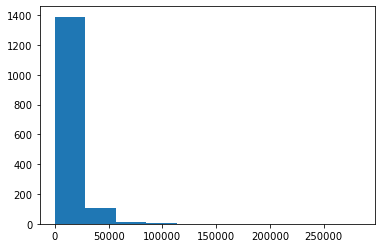

In [154]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [155]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.90)]
# new_df = df[(df['Total Interactions'] < df['Total Interactions'].quantile(0.80)) & (df['Total Interactions'] > df['Total Interactions'].quantile(0.20))]
# plt.hist(new_df['Total Interactions'])

In [156]:
new_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0
mean,0.4,0.8,0.6,0.4,1.1,0.3,0.0,0.0,0.1,0.6,3005291.2,6764.7,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.2,0.5,3762862.8,8527.6,0.1,0.4,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24344.5,87.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,330523.5,1627.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,7367298.5,14687.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,9314330.0,27045.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [157]:
df[df['Total Interactions']>100000].count()

Child                   5
Smile                   5
Female                  5
Male                    5
PeopleNumber            5
Text                    5
close_up                5
Indoors                 5
Outdoors                5
dominantColor           5
LOGO                    5
Followers at Posting    5
Total Interactions      5
Contrast                5
ANGRY                   5
CALM                    5
CONFUSED                5
DISGUSTED               5
FEAR                    5
HAPPY                   5
SAD                     5
SURPRISED               5
dtype: int64

In [158]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

0        4.593569
1        3.093195
2        3.393552
3        4.390779
4        5.781499
          ...    
1549     4.531411
1550    21.638655
1551     7.973143
1552    10.924370
1553     5.042017
Length: 1368, dtype: float64

C:\Users\User\anaconda3\envs\Diplomatiki\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    1368.000000
mean        3.975115
std         5.105046
min         0.422789
25%         2.081844
50%         2.815274
75%         4.136985
max       139.164638
dtype: float64

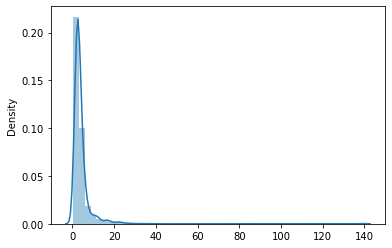

In [159]:
sns.distplot(y)
y.describe()

In [160]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,1,0,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,0,0,0,0,green,1,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,0,0
3,1,1,1,0,1,0,0,0,1,grey,1,HIGH,0,1,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,1,1,1,2,0,0,0,0,brown,0,HIGH,0,1,0,0,0,1,0,0
1550,1,1,1,1,2,0,0,0,0,grey,0,HIGH,0,0,0,0,0,1,0,0
1551,0,1,1,1,2,1,0,0,0,grey,0,HIGH,0,1,0,0,1,1,0,0
1552,1,1,1,1,2,0,0,0,0,brown,0,HIGH,0,1,0,0,0,1,1,0


In [161]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,1,2,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1,1,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
4,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,1,1,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1550,1,1,1,1,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1551,0,1,1,1,2,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1552,1,1,1,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [162]:
# y = (y - y.min())/(y.max() - y.min())

In [163]:
def change_types(X):
    X['dominantColor_blue'] =X['dominantColor_blue'].astype('int64')
    X['dominantColor_brown'] =X['dominantColor_brown'].astype('int64')
    X['dominantColor_cyan'] =X['dominantColor_cyan'].astype('int64')
    X['dominantColor_green'] =X['dominantColor_green'].astype('int64')
    X['dominantColor_grey'] =X['dominantColor_grey'].astype('int64')
    X['dominantColor_orange'] =X['dominantColor_orange'].astype('int64')
    X['dominantColor_pink'] =X['dominantColor_pink'].astype('int64')
    X['dominantColor_purple'] =X['dominantColor_purple'].astype('int64')
    X['dominantColor_red'] =X['dominantColor_red'].astype('int64')
    X['dominantColor_white'] =X['dominantColor_white'].astype('int64')
    X['dominantColor_yellow'] =X['dominantColor_yellow'].astype('int64')
    X['Contrast_HIGH'] =X['Contrast_HIGH'].astype('int64')
    X['Contrast_LOW'] =X['Contrast_LOW'].astype('int64')
    return X

In [164]:
X = change_types(X)
X.dtypes

Child                   int64
Smile                   int64
Female                  int64
Male                    int64
PeopleNumber            int64
Text                    int64
close_up                int64
Indoors                 int64
Outdoors                int64
LOGO                    int64
ANGRY                   int64
CALM                    int64
CONFUSED                int64
DISGUSTED               int64
FEAR                    int64
HAPPY                   int64
SAD                     int64
SURPRISED               int64
dominantColor_blue      int64
dominantColor_brown     int64
dominantColor_cyan      int64
dominantColor_green     int64
dominantColor_grey      int64
dominantColor_orange    int64
dominantColor_pink      int64
dominantColor_purple    int64
dominantColor_red       int64
dominantColor_white     int64
dominantColor_yellow    int64
Contrast_HIGH           int64
Contrast_LOW            int64
dtype: object

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [167]:
print(metrics.mean_squared_error(y_test, y_pred))

print(metrics.median_absolute_error(y_test, y_pred))

print(metrics.mean_absolute_percentage_error(y_test, y_pred))

32.61709084134016
0.8939607983037754
0.7159835824579004


In [168]:
rf_reg.score(X_test, y_test)

-1.9005314129433546

In [169]:
for imp, name in zip(rf_reg.feature_importances_, rf_reg.feature_names_in_):
    print(name, imp)

Child 0.028715798978595015
Smile 0.07273923618960819
Female 0.027627763672712854
Male 0.02579890594155475
PeopleNumber 0.1259360206384973
Text 0.10666336977875386
close_up 0.008877825299826584
Indoors 0.004515732144640733
Outdoors 0.018532718998815735
LOGO 0.21411703733377585
ANGRY 0.009243647622360771
CALM 0.027751660002572932
CONFUSED 0.0007329118502877247
DISGUSTED 0.000445248071652381
FEAR 0.013105883904554357
HAPPY 0.024262925491793746
SAD 0.013118282778181433
SURPRISED 0.0028723037047993275
dominantColor_blue 0.0104072761632134
dominantColor_brown 0.024353062381727
dominantColor_cyan 0.011264984072645574
dominantColor_green 0.05526306892690934
dominantColor_grey 0.02054681635856298
dominantColor_orange 0.0003805670123419475
dominantColor_pink 0.0008760900469379155
dominantColor_purple 0.014014453751375515
dominantColor_red 0.0069777459874231845
dominantColor_white 0.0006516551606857672
dominantColor_yellow 0.008652329067617977
Contrast_HIGH 0.05037769996561927
Contrast_LOW 0.0711

In [170]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [171]:
model.score(X_test, y_test)

0.1562360330496818

## Balance dataset

In [172]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [173]:
X['Targets']=y

In [174]:
X = downsample(X, 'Targets')
y = X['Targets']

In [175]:
X = X.drop('Targets', axis=1)

In [176]:
X.shape

(1367, 31)

In [177]:
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1363,0,1,0,1,2,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1364,1,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1365,1,1,1,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [179]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [180]:
rf_reg.score(X_test, y_test)

-0.3042685311057274

In [181]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [182]:
model.score(X_test, y_test)

0.17201787864878482

In [183]:
important_features = pd.Series(data=rf_reg.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

LOGO                    0.219075
Text                    0.129791
PeopleNumber            0.098785
Smile                   0.079051
Contrast_LOW            0.048325
dominantColor_green     0.041802
Child                   0.037947
CALM                    0.034650
Contrast_HIGH           0.033831
Female                  0.031280
Outdoors                0.030288
HAPPY                   0.029618
Male                    0.028317
dominantColor_brown     0.024298
SAD                     0.019541
FEAR                    0.018647
dominantColor_grey      0.017430
dominantColor_purple    0.014456
dominantColor_cyan      0.013578
close_up                0.010910
dominantColor_red       0.009209
ANGRY                   0.007207
Indoors                 0.006995
dominantColor_blue      0.006594
CONFUSED                0.002988
SURPRISED               0.002426
dominantColor_pink      0.001614
dominantColor_white     0.000655
dominantColor_yellow    0.000481
DISGUSTED               0.000116
dominantCo

In [184]:
predictions = model.predict(X_test)

C:\Users\User\anaconda3\envs\Diplomatiki\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Targets'>

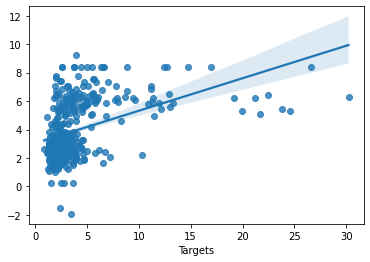

In [185]:
sns.regplot(y_test,predictions)